# XGBoost

## Prepare execution

### Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

### Load both datasets

In [6]:
train_df = pd.read_csv('../data/loan_data_prepared_train.csv')
test_df = pd.read_csv('../data/loan_data_prepared_test.csv')

### Goal Column

In [7]:
target_col = 'loan_status'

### Split X and Y

In [8]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

## Train Model

### Create XGBoost Classifier

In [9]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/home/ced/src/ml-models-comparison/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:29:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## Test

### Predict output

In [10]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

### Evaluate model on test data

In [12]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_binary), 3))

Accuracy: 0.933


### Display Confusion Matrix

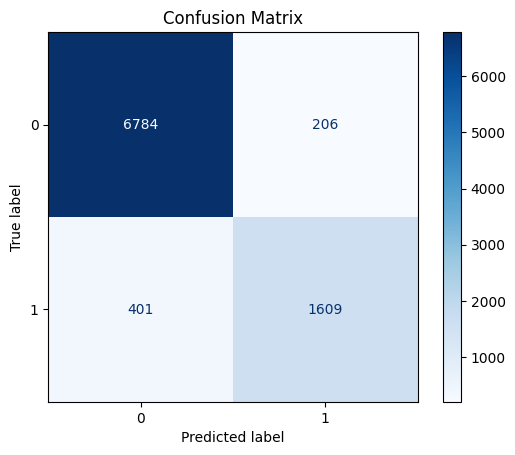

In [13]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()